In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/New Zeolite/Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape



(1330, 19)

In [3]:
A=df['Ge/Si']
B=df["Al/T"]
C = df['OH/T']
D = df['H2O/T']
E = df["F/T"]
F=df['SDA/T']
G=df["B/T"]
H = df['Na2O/T']
I = df['Cl/T']
J=df['Temperature']
K=df["time"]
L = df['AR']
M=df['Area']
N= df['C/N']
O= df['rpm']
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape

(1330, 15)

In [4]:
X_OS=List1
Y_OS=df["RC2"]


train accuracy 0.9857142857142858
test accuracy 0.9248120300751879
train precision 0.9820119483616594
test precision 0.914288547360746
train recall 0.984861605792658
test recall 0.9122870369291366
train f1 0.9834118103467077
test f1 0.9123645748443916
train               precision    recall  f1-score   support

           0       0.99      0.98      0.99       824
           1       0.97      0.98      0.97       373

    accuracy                           0.98      1197
   macro avg       0.98      0.98      0.98      1197
weighted avg       0.98      0.98      0.98      1197

test               precision    recall  f1-score   support

           0       0.95      0.90      0.93        91
           1       0.81      0.90      0.85        42

    accuracy                           0.90       133
   macro avg       0.88      0.90      0.89       133
weighted avg       0.91      0.90      0.90       133

Matthews correlation coefficient 0.9668675980393922


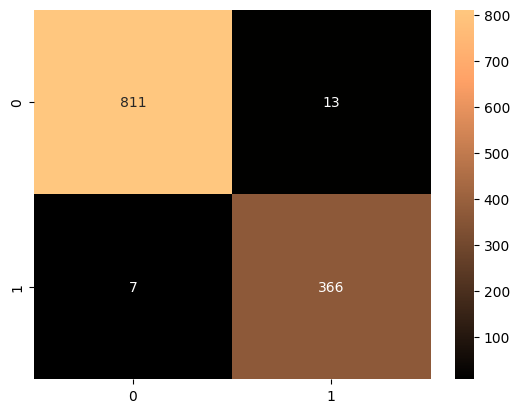

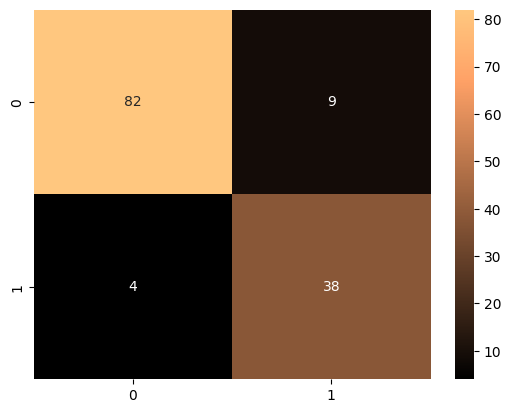

In [5]:
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RF=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1,  n_estimators=300, min_samples_split= 4)
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmc_RF.append(mmc)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient',mean(mmc_RF))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9952380952380953
test accuracy 0.9375939849624059
train precision 0.9928245008630541
test precision 0.927629803159434
train recall 0.9961737983756971
test recall 0.9288472220603715
train f1 0.9944733558134236
test f1 0.9274172633830398
train               precision    recall  f1-score   support

           0       1.00      0.99      1.00       824
           1       0.99      1.00      0.99       373

    accuracy                           0.99      1197
   macro avg       0.99      1.00      0.99      1197
weighted avg       1.00      0.99      0.99      1197

test               precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.91      0.93      0.92        42

    accuracy                           0.95       133
   macro avg       0.94      0.94      0.94       133
weighted avg       0.95      0.95      0.95       133

Matthews correlation coefficient 0.9889920683792367


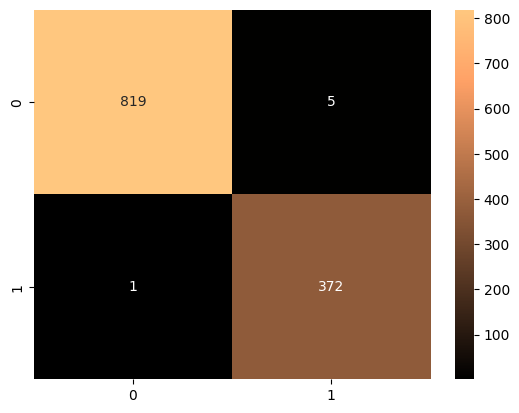

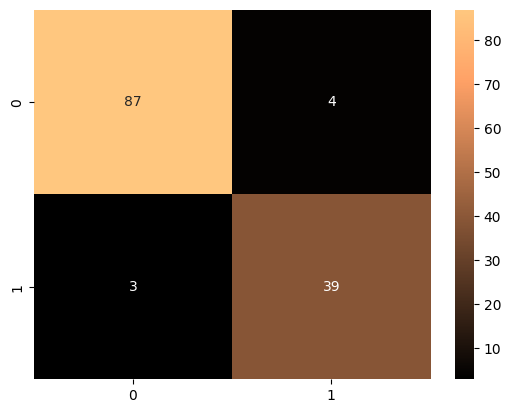

In [6]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1, n_estimators=800,learning_rate=0.111, 
                                min_samples_split=2, max_depth=3, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0, min_impurity_decrease=0)
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_gb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient',mean(mmc_gb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



train accuracy 0.9944862155388471
test accuracy 0.9360902255639096
train precision 0.9915196106036411
test precision 0.9259806165874988
train recall 0.9957736183657868
test recall 0.9278123652593429
train f1 0.9936068273523417
test f1 0.9256687413428011
train               precision    recall  f1-score   support

           0       1.00      0.99      1.00       824
           1       0.98      1.00      0.99       373

    accuracy                           0.99      1197
   macro avg       0.99      1.00      0.99      1197
weighted avg       0.99      0.99      0.99      1197

test               precision    recall  f1-score   support

           0       0.97      0.92      0.94        91
           1       0.85      0.93      0.89        42

    accuracy                           0.92       133
   macro avg       0.91      0.93      0.92       133
weighted avg       0.93      0.92      0.93       133

Matthews correlation coefficient 0.9872836638022331


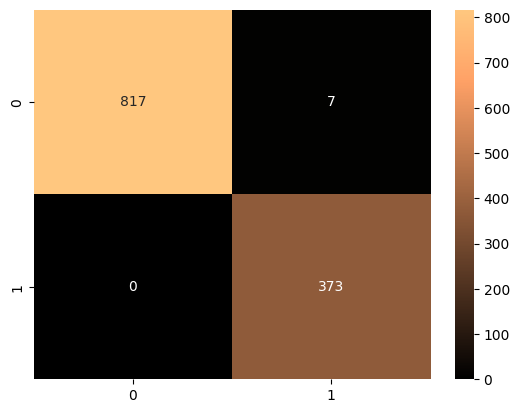

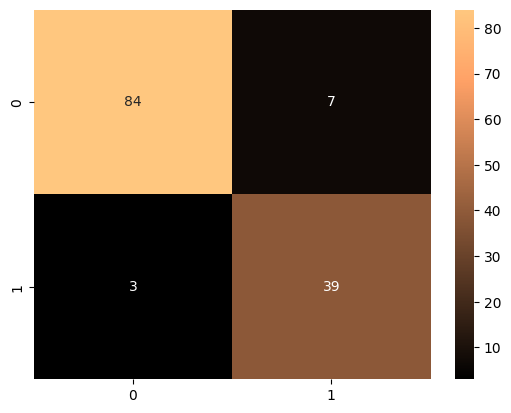

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1, n_estimators=1600, learning_rate=0.291, 
                    alpha=0.0001, min_child_weight=1, max_depth=6, colsample_bytree=1,
                    reg_lambda=1 )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_xgb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient',mean(mmc_xgb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


 99%|===================| 1185/1197 [01:00<00:00]        

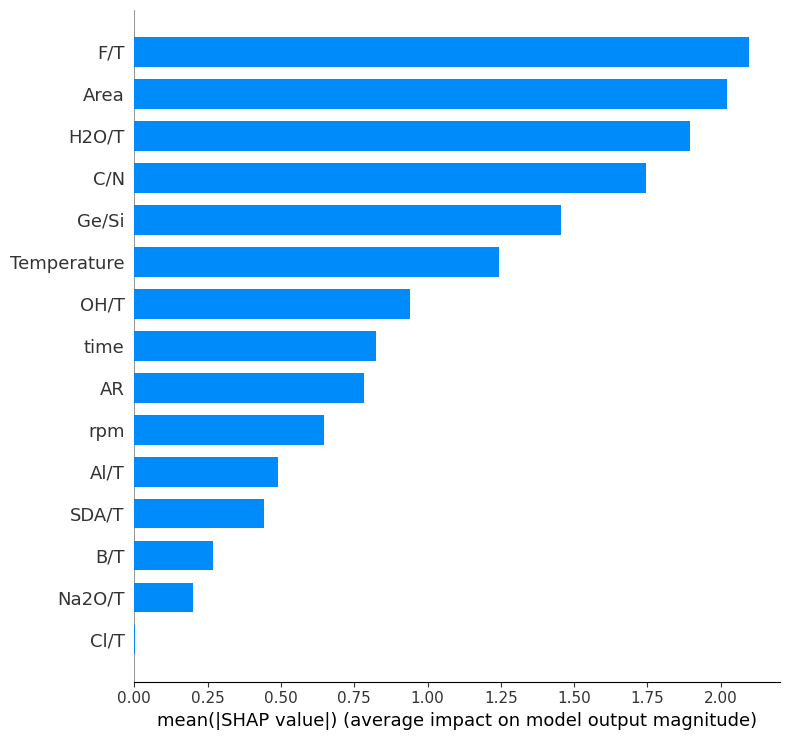

In [8]:
import shap
explainer = shap.TreeExplainer(XGB, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')


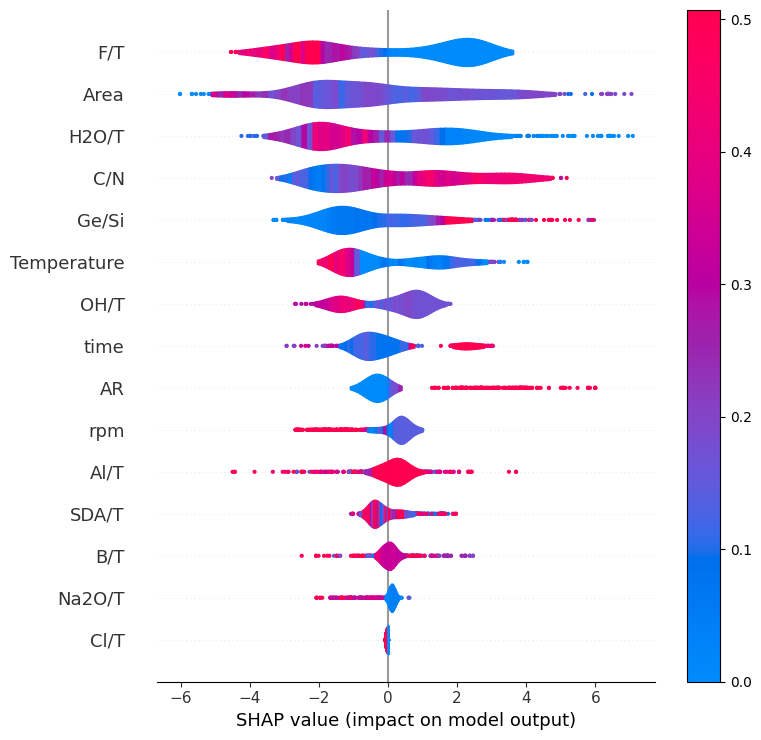

In [10]:
shap.summary_plot(shap_values_XGB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

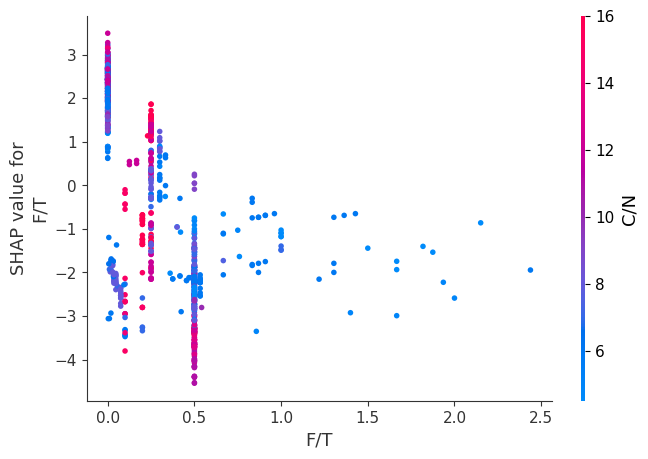

In [11]:
shap.dependence_plot("F/T", shap_values_XGB, X_Train)

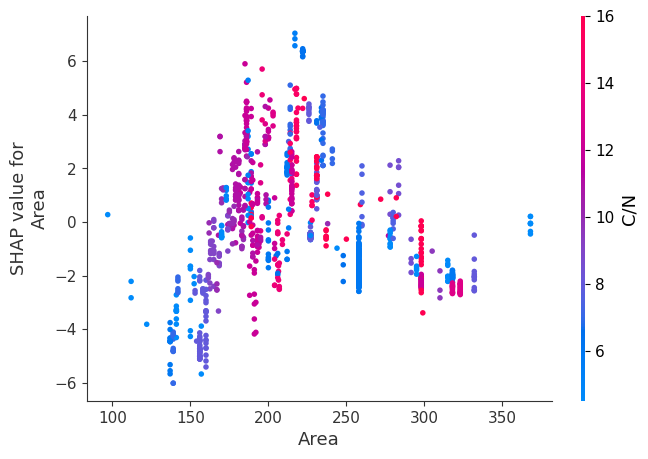

In [12]:
shap.dependence_plot("Area", shap_values_XGB, X_Train)

train accuracy 0.9691729323308271
test accuracy 0.9233082706766916
train precision 0.9624173246114957
test precision 0.9104167676000816
train recall 0.9661857953482883
test recall 0.9137470915440161
train f1 0.9642477081539965
test f1 0.9110501315083223
train               precision    recall  f1-score   support

           0       0.98      0.97      0.97       824
           1       0.94      0.95      0.94       373

    accuracy                           0.96      1197
   macro avg       0.96      0.96      0.96      1197
weighted avg       0.97      0.96      0.96      1197

test               precision    recall  f1-score   support

           0       0.94      0.92      0.93        91
           1       0.84      0.88      0.86        42

    accuracy                           0.91       133
   macro avg       0.89      0.90      0.90       133
weighted avg       0.91      0.91      0.91       133

Matthews correlation coefficient 0.9285907099811318


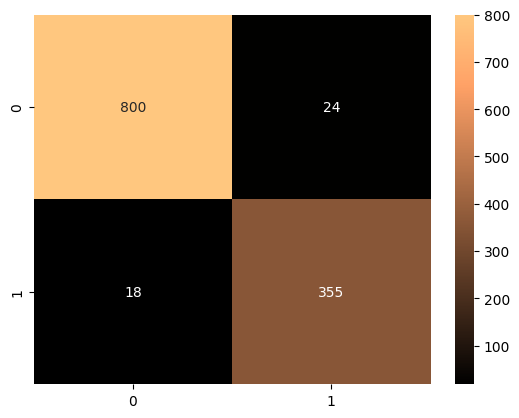

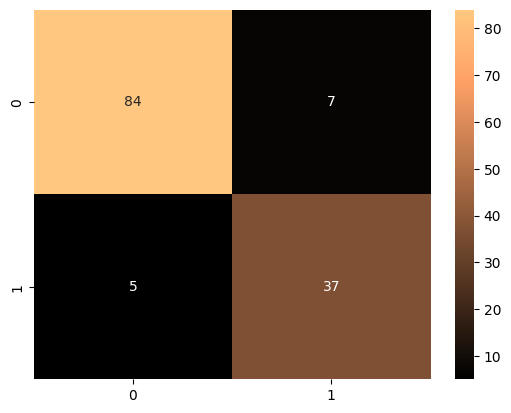

In [13]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_et=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1, n_estimators=500, min_samples_split=4, min_samples_leaf=2)
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_et.append(mmc)
   
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient',mean(mmc_et))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()

train accuracy 0.9952380952380953
test accuracy 0.9210526315789472
train precision 0.9965638617794699
test precision 0.9079027035589691
train recall 0.9923685681925706
test recall 0.9095927093408536
train f1 0.9944298352879409
test f1 0.9080558645785637
train               precision    recall  f1-score   support

           0       0.99      1.00      1.00       824
           1       1.00      0.98      0.99       373

    accuracy                           0.99      1197
   macro avg       1.00      0.99      0.99      1197
weighted avg       1.00      0.99      0.99      1197

test               precision    recall  f1-score   support

           0       0.95      0.92      0.94        91
           1       0.84      0.90      0.87        42

    accuracy                           0.92       133
   macro avg       0.90      0.91      0.91       133
weighted avg       0.92      0.92      0.92       133

Matthews correlation coefficient 0.9889232436135735


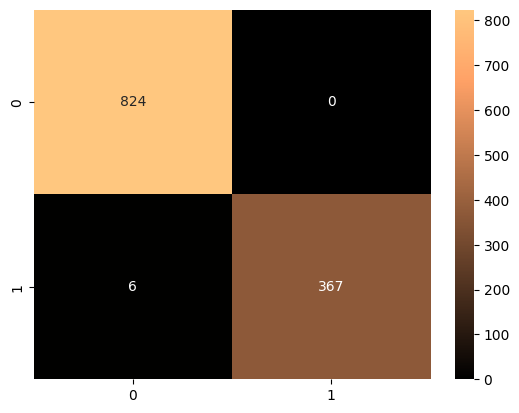

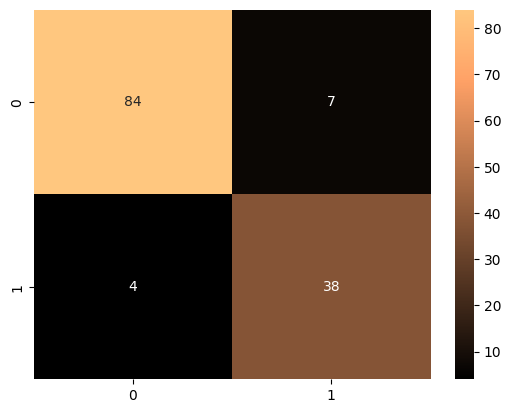

In [14]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dt=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1)
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dt.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient',mean(mmc_dt))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



train accuracy 0.8904761904761905
test accuracy 0.8714285714285713
train precision 0.8694238252577959
test precision 0.8504226414587415
train recall 0.8813290621344055
test recall 0.855641967611745
train f1 0.8745898382685662
test f1 0.8513024559860869
train               precision    recall  f1-score   support

           0       0.93      0.92      0.92       824
           1       0.82      0.84      0.83       373

    accuracy                           0.89      1197
   macro avg       0.87      0.88      0.88      1197
weighted avg       0.89      0.89      0.89      1197

test               precision    recall  f1-score   support

           0       0.91      0.89      0.90        91
           1       0.77      0.81      0.79        42

    accuracy                           0.86       133
   macro avg       0.84      0.85      0.85       133
weighted avg       0.87      0.86      0.87       133

Matthews correlation coefficient 0.7506075948451026


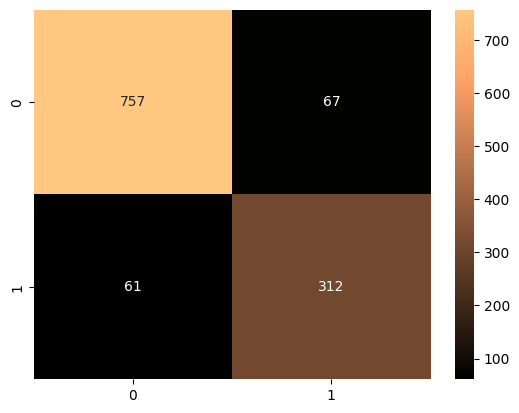

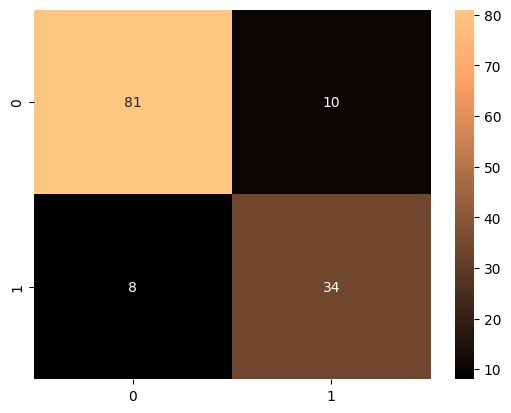

In [15]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dt=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT_four=DecisionTreeClassifier(random_state=1, max_depth=4)
    dt_model=DT_four.fit(X_Train,Y_Train)    
    predict_dttrain=DT_four.predict(X_Train)
    predict_dttest=DT_four.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dt.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient',mean(mmc_dt))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



In [16]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO

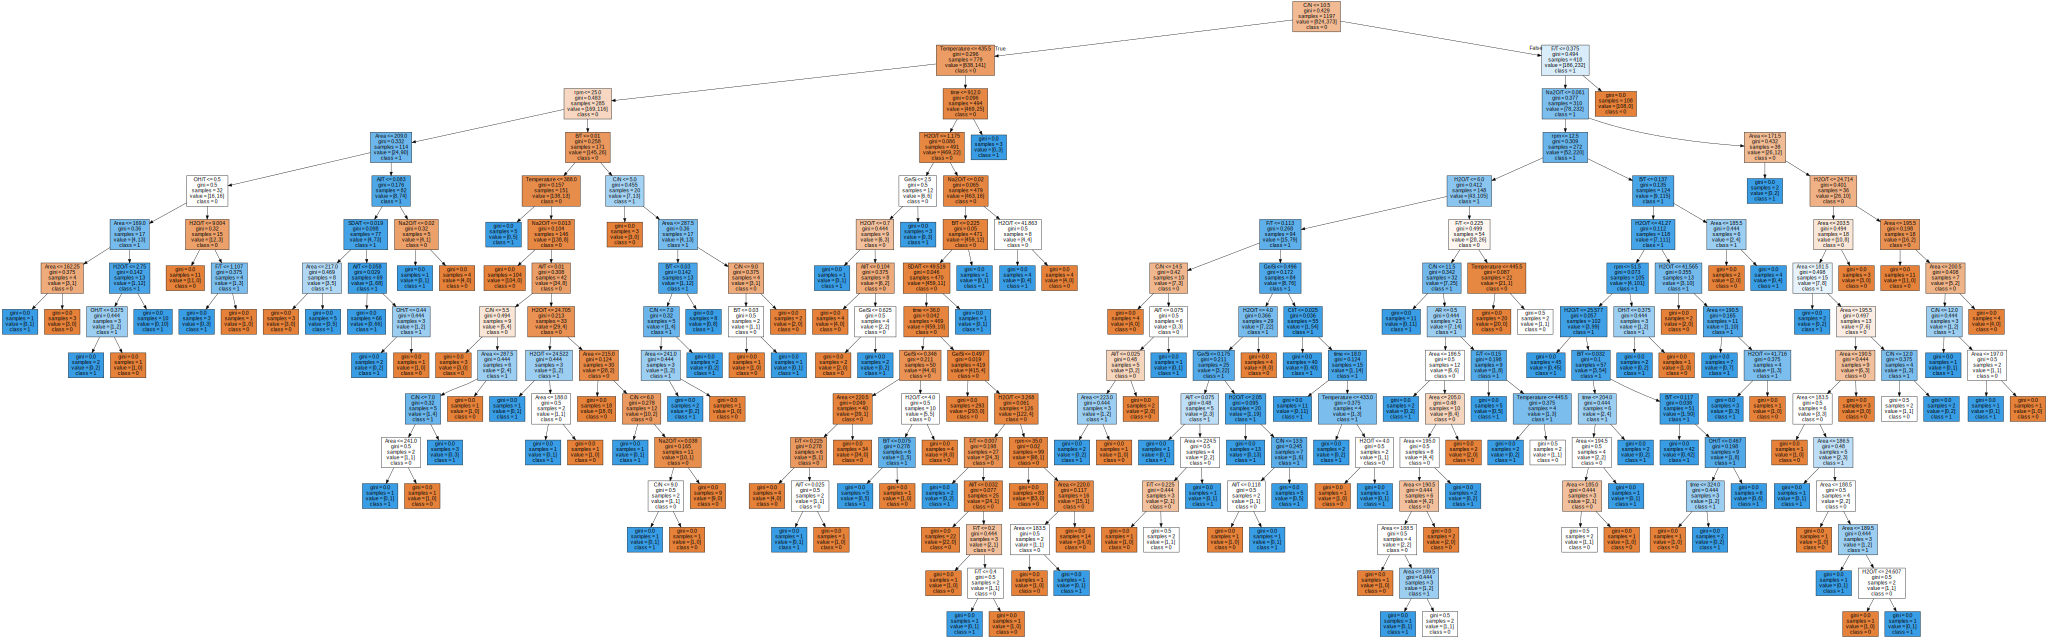

In [17]:
fn=['Ge/Si', 'Al/T', 'OH/T', 'H2O/T', 'F/T', 'SDA/T', "B/T", "Na2O/T", "Cl/T", "Temperature", "time", "AR", "Area", "C/N", "rpm"]
cn=["0", "1"]
dot_data = tree.export_graphviz(DT,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 
       

In [18]:
graph.render("DTNZWOA")

'DTNZWOA.png'

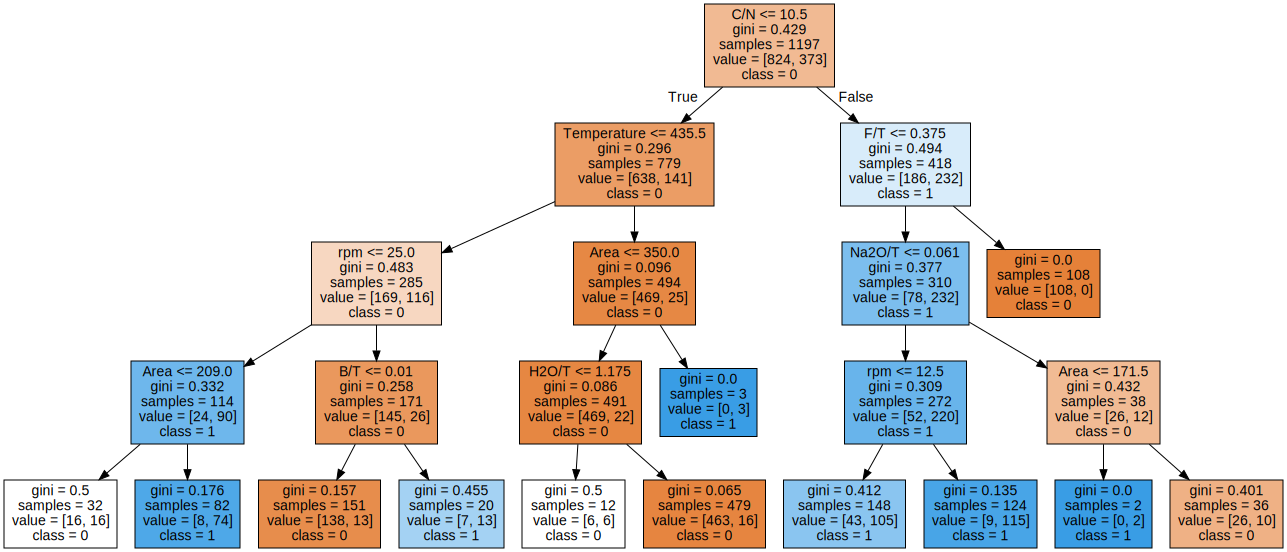

In [19]:
fn=['Ge/Si', 'Al/T', 'OH/T', 'H2O/T', 'F/T', 'SDA/T', "B/T", "Na2O/T", "Cl/T", "Temperature", "time", "AR", "Area", "C/N", "rpm"]
cn=["0", "1"]
dot_data = tree.export_graphviz(DT_four,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 

In [20]:
graph.render("DT4NZWOA")

'DT4NZWOA.png'

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predicti

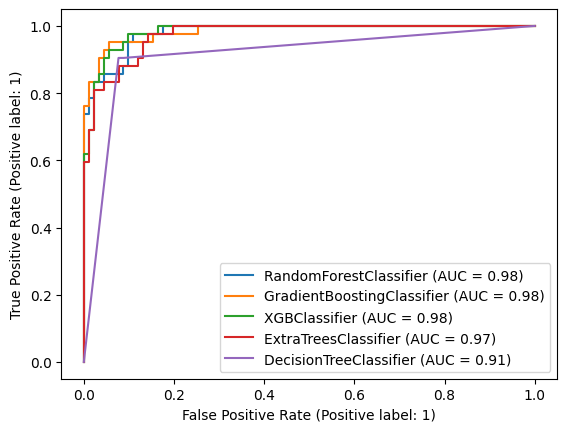

In [21]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_roc_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_roc_curve(GB,X_Test,Y_Test, ax=ax)
xgb_disp=plot_roc_curve(XGB,X_Test,Y_Test, ax=ax)
et_disp=plot_roc_curve(ET,X_Test,Y_Test, ax=ax)
dt_disp=plot_roc_curve(DT,X_Test,Y_Test, ax=ax)
plt.show()


Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_est

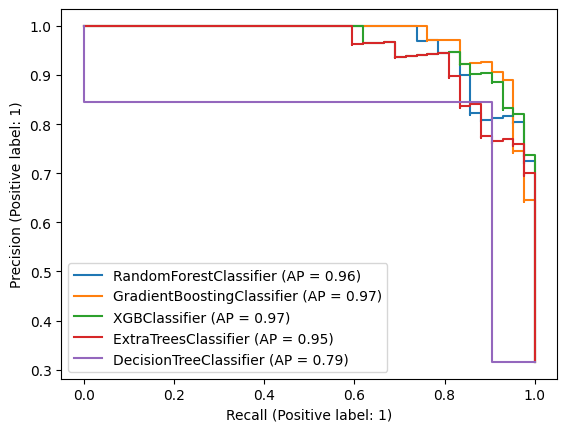

In [22]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_precision_recall_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_precision_recall_curve(GB, X_Test,Y_Test, ax=ax)
xgb_disp=plot_precision_recall_curve(XGB, X_Test,Y_Test, ax=ax)
et_disp=plot_precision_recall_curve(ET, X_Test,Y_Test, ax=ax)
dt_disp=plot_precision_recall_curve(DT, X_Test,Y_Test, ax=ax)
plt.show()